# Fire Incident Perimeter of Palisade and Eaton

We use CA Perimeters CAL FIRE NIFC FIRIS public view provided by California Department of Forestry and Fire Protection. This map highlights the California Department of Forestry and Fire Protection's (CAL FIRE) historical fire perimeter dataset with additional authoritative layers for data exploration.

More infomation can be found: https://hub.arcgis.com/datasets/CALFIRE-Forestry::ca-perimeters-cal-fire-nifc-firis-public-view/about

In [19]:
import geopandas as gpd
from shapely.geometry import box
import urllib.parse
import pandas as pd

# Define LA bounding box
la_bbox = box(-119, 33.5, -117.5, 34.8)

# Load data from ArcGIS FeatureServer and filter to only LA region and January 2025
# Encode the where clause properly
where_clause = "poly_DateCurrent >= DATE '2025-01-01' AND poly_DateCurrent <= DATE '2025-01-31'"
where_encoded = urllib.parse.quote(where_clause)

# Construct the corrected URL
url = f"https://services5.arcgis.com/bz1uwWPKUInZBK94/arcgis/rest/services/CA_Perimeters_NIFC_FIRIS_public_view/FeatureServer/0/query?where={where_encoded}&outFields=*&geometry=-119,33.5,-117.5,34.8&geometryType=esriGeometryEnvelope&spatialRel=esriSpatialRelIntersects&f=geojson"

# Read data to geopandas
gdf = gpd.read_file(url)

# Ensure the GeoDataFrame has a valid coordinate system
if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)  # Set to WGS84 if missing

# Filter data to ensure it's inside LA
gdf_la = gdf[gdf.intersects(la_bbox)]

# change the time variable to datetime for readability
# original they are stored as timestamp in milliseconds since 1970-01-01 (Unix Epoch)
gdf_la["poly_DateCurrent"] = pd.to_datetime(gdf_la["poly_DateCurrent"], unit="ms")

In [20]:
gdf_la.head()

,OBJECTID,GlobalID,type,source,poly_DateCurrent,mission,incident_name,incident_number,area_acres,NIFC_GISAcres,...,PercentPerimToBeContained,ModifiedBySystem2,sourceoid,websiteId,websiteDbId,dataverseId,displayStatus,Shape__Area,Shape__Length,geometry
0,1303,ef7d3b58-dc12-4c78-9ee5-fff6a3d52202,Heat Perimeter,CAL FIRE INTEL FLIGHT DATA,2025-01-12 12:36:00.000,PALISADES,PALISADES,a7ea5d21-f882-44b8-bf64-44ab11059dc1,23706.600000,None,...,None,None,None,abfed7a3-794a-4294-9852-43176dcbc18a,4318,f0a2f70e-2dcd-ef11-b8e9-001dd804aa64,Inactive,0.009370,1.067430,"MULTIPOLYGON (((-118.60006 34.08394, -118.6000..."
1,1271,1d19877c-dfa3-4a5c-a5ea-8ae6e8c7521f,Heat Perimeter,FIRIS,2025-01-09 05:35:41.395,CA-LFD-SUNSET-N40Y,None,None,42.770648,None,...,None,None,None,None,None,None,Inactive,0.000017,0.025883,"MULTIPOLYGON (((-118.35439 34.1058, -118.35442..."
2,1314,f8adaebb-933e-409e-8507-6bc3641ea2f2,Heat Perimeter,FIRIS,2025-01-22 21:02:06.289,CA-ANF-HUGHES-N40Y,None,None,5054.058020,None,...,None,None,None,None,None,None,Inactive,0.002009,0.500763,"MULTIPOLYGON (((-118.57991 34.54109, -118.5800..."
3,1291,af8d5303-85a4-4e30-813d-3c21ed3a237b,Heat Perimeter,FIRIS,2025-01-10 19:58:23.620,CA-LFD-ARCHER-N40Y,None,None,18.756262,None,...,None,None,None,None,None,None,Inactive,0.000007,0.015840,"MULTIPOLYGON (((-118.51305 34.3112, -118.51308..."
4,1334,57d3d6cb-29dd-4681-bc9c-90d8e28fed43,Heat Perimeter,CAL FIRE INTEL FLIGHT DATA,2025-01-11 23:20:00.000,PALISADES,PALISADES,A7EA5D21-F882-44B8-BF64-44AB11059DC1,23654.160000,None,...,None,None,None,abfed7a3-794a-4294-9852-43176dcbc18a,4318,f0a2f70e-2dcd-ef11-b8e9-001dd804aa64,Inactive,0.009349,1.073416,"MULTIPOLYGON (((-118.52406 34.03089, -118.5243..."


### Filter incident related to 2025 LA fire in Palisades and Eaton
and sort it in time (`poly_DateCurrent`)

In [21]:
filtered_gdf = (
    gdf_la[gdf_la["mission"].str.contains("palisades|eaton", case=False, na=False)]
    .sort_values(by="poly_DateCurrent")
    .reset_index(drop=True)
)

In [22]:
filtered_gdf

,OBJECTID,GlobalID,type,source,poly_DateCurrent,mission,incident_name,incident_number,area_acres,NIFC_GISAcres,...,PercentPerimToBeContained,ModifiedBySystem2,sourceoid,websiteId,websiteDbId,dataverseId,displayStatus,Shape__Area,Shape__Length,geometry
0,1264,0bc1ddb3-63bf-4fd8-a01b-d522f57e4083,Heat Perimeter,FIRIS,2025-01-07 23:17:39.000,CA-LFD-PALISADES-N57B,None,None,1261.520779,None,...,None,None,None,None,None,None,Inactive,0.000499,0.342099,"MULTIPOLYGON (((-118.55013 34.06195, -118.5501..."
1,1265,80a365ca-2de5-434e-8bd8-195405caefec,Heat Perimeter,FIRIS,2025-01-08 02:17:54.000,CA-LFD-PALISADES-N57B,None,None,2920.451532,None,...,None,None,None,None,None,None,Inactive,0.001154,0.621555,"MULTIPOLYGON (((-118.55132 34.06361, -118.5514..."
2,1269,ea6b6983-73b6-49fa-b467-1081579fb284,Heat Perimeter,FIRIS,2025-01-09 02:29:10.844,CA-LAC-EATON-N57B,None,None,10589.956010,None,...,None,None,None,None,None,None,Inactive,0.004192,0.818015,"MULTIPOLYGON (((-118.0668 34.20919, -118.06685..."
3,1339,321b0378-75b8-4a9e-a747-6ee85c346a68,Heat Perimeter,CAL FIRE INTEL FLIGHT DATA,2025-01-10 17:30:00.000,Palisades,Palisades,,20330.110000,None,...,None,None,None,abfed7a3-794a-4294-9852-43176dcbc18a,4318,f0a2f70e-2dcd-ef11-b8e9-001dd804aa64,Inactive,0.008035,1.024800,"MULTIPOLYGON (((-118.52406 34.03089, -118.5243..."
4,1337,b9ced2c5-5415-413d-8cbf-52b294a80355,Heat Perimeter,CAL FIRE INTEL FLIGHT DATA,2025-01-11 00:30:43.000,PALISADES,PALISADES,A7EA5D21-F882-44B8-BF64-44AB11059DC1,20753.260000,None,...,None,None,None,abfed7a3-794a-4294-9852-43176dcbc18a,4318,f0a2f70e-2dcd-ef11-b8e9-001dd804aa64,Inactive,0.008202,1.020702,"MULTIPOLYGON (((-118.52406 34.03089, -118.5243..."
5,1335,0b226239-6366-451f-b16b-8ae87eedf349,Heat Perimeter,CAL FIRE INTEL FLIGHT DATA,2025-01-11 18:38:00.000,PALISADES,PALISADES,A7EA5D21-F882-44B8-BF64-44AB11059DC1,23165.680000,None,...,None,None,None,abfed7a3-794a-4294-9852-43176dcbc18a,4318,f0a2f70e-2dcd-ef11-b8e9-001dd804aa64,Inactive,0.009156,1.066727,"MULTIPOLYGON (((-118.52406 34.03089, -118.5243..."
6,1299,25b58865-7079-4ca2-95c8-b1989b61ef71,Heat Perimeter,CAL FIRE INTEL FLIGHT DATA,2025-01-11 18:55:00.000,Eaton,Eaton,72660adc-b5ef-4d96-a33f-b4ea3740a4e3,13991.600000,None,...,None,None,None,dbfa574e-1b10-4467-b5e5-7d1c06ebc8dc,4319,2b91dbc1-79cd-ef11-b8e9-001dd804aa64,Inactive,0.005538,0.828190,"MULTIPOLYGON (((-118.13628 34.17676, -118.1366..."
7,1334,57d3d6cb-29dd-4681-bc9c-90d8e28fed43,Heat Perimeter,CAL FIRE INTEL FLIGHT DATA,2025-01-11 23:20:00.000,PALISADES,PALISADES,A7EA5D21-F882-44B8-BF64-44AB11059DC1,23654.160000,None,...,None,None,None,abfed7a3-794a-4294-9852-43176dcbc18a,4318,f0a2f70e-2dcd-ef11-b8e9-001dd804aa64,Inactive,0.009349,1.073416,"MULTIPOLYGON (((-118.52406 34.03089, -118.5243..."
8,1303,ef7d3b58-dc12-4c78-9ee5-fff6a3d52202,Heat Perimeter,CAL FIRE INTEL FLIGHT DATA,2025-01-12 12:36:00.000,PALISADES,PALISADES,a7ea5d21-f882-44b8-bf64-44ab11059dc1,23706.600000,None,...,None,None,None,abfed7a3-794a-4294-9852-43176dcbc18a,4318,f0a2f70e-2dcd-ef11-b8e9-001dd804aa64,Inactive,0.009370,1.067430,"MULTIPOLYGON (((-118.60006 34.08394, -118.6000..."
9,1338,cc0f0ada-fc1a-4772-bb1a-464b713fd537,Heat Perimeter,CAL FIRE INTEL FLIGHT DATA,2025-01-12 12:36:00.000,PALISADES,PALISADES,A7EA5D21-F882-44B8-BF64-44AB11059DC1,23706.600000,None,...,None,None,None,abfed7a3-794a-4294-9852-43176dcbc18a,4318,f0a2f70e-2dcd-ef11-b8e9-001dd804aa64,Inactive,0.009370,1.067430,"MULTIPOLYGON (((-118.52406 34.03089, -118.5243..."


### What is the incident time period?

In [23]:
min_date = filtered_gdf['poly_DateCurrent'].min()
max_date = filtered_gdf['poly_DateCurrent'].max()

print(f"Start date: {min_date.date()}")
print(f"End date: {max_date.date()}")

Start date: 2025-01-07
End date: 2025-01-12


### Create a new column 'mission_group'
To standardrize the 'incident name' for grouping Palisades incident and Eaton incident

In [24]:
filtered_gdf["mission_group"] = filtered_gdf["mission"].str.contains("palisades", case=False, na=False).map({True: "Palisades", False: "Eaton"})
merged_gdf = filtered_gdf.dissolve(by="mission_group")

In [25]:
# merged_gdf.explore()

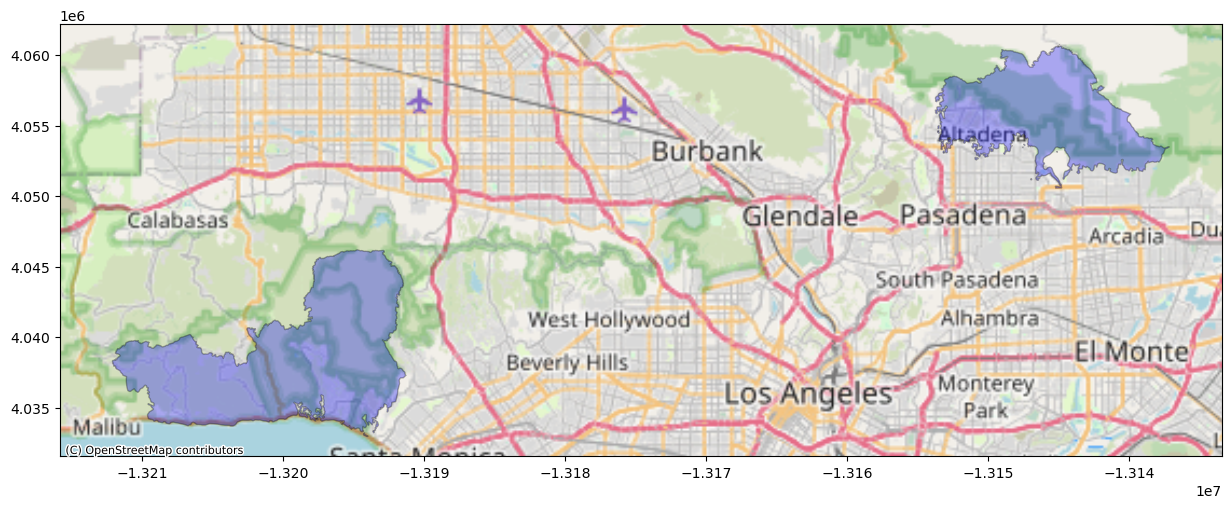

In [29]:
import contextily as ctx
import matplotlib.pyplot as plt

merged_gdf_plot = merged_gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 10))
merged_gdf_plot.plot(ax=ax, edgecolor="black", facecolor="blue", alpha=0.3, linewidth=1)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=merged_gdf_plot.crs)

plt.show()

### Save the perimeter

In [38]:
merged_gdf.to_file("WILDFIRE/Data/fires_perimeter.geojson", driver="GeoJSON")